In [1]:
import pandas as pd

In [4]:
df= pd.read_csv("HousingData_Clean.csv", index_col=0)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [5]:
df.to_csv('Housing2.csv', index=False) # oluştururken

In [12]:
X=df.drop(columns= ["MEDV"]) # girdi matrixi
y=df["MEDV"] # cıktı vektör

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42, test_size=0.3)

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
model= DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae} MSE: {mse} R2: {r2}")

MAE: 2.7644505149644663 MSE: 20.011237519449367 R2: 0.7314399923001051


In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

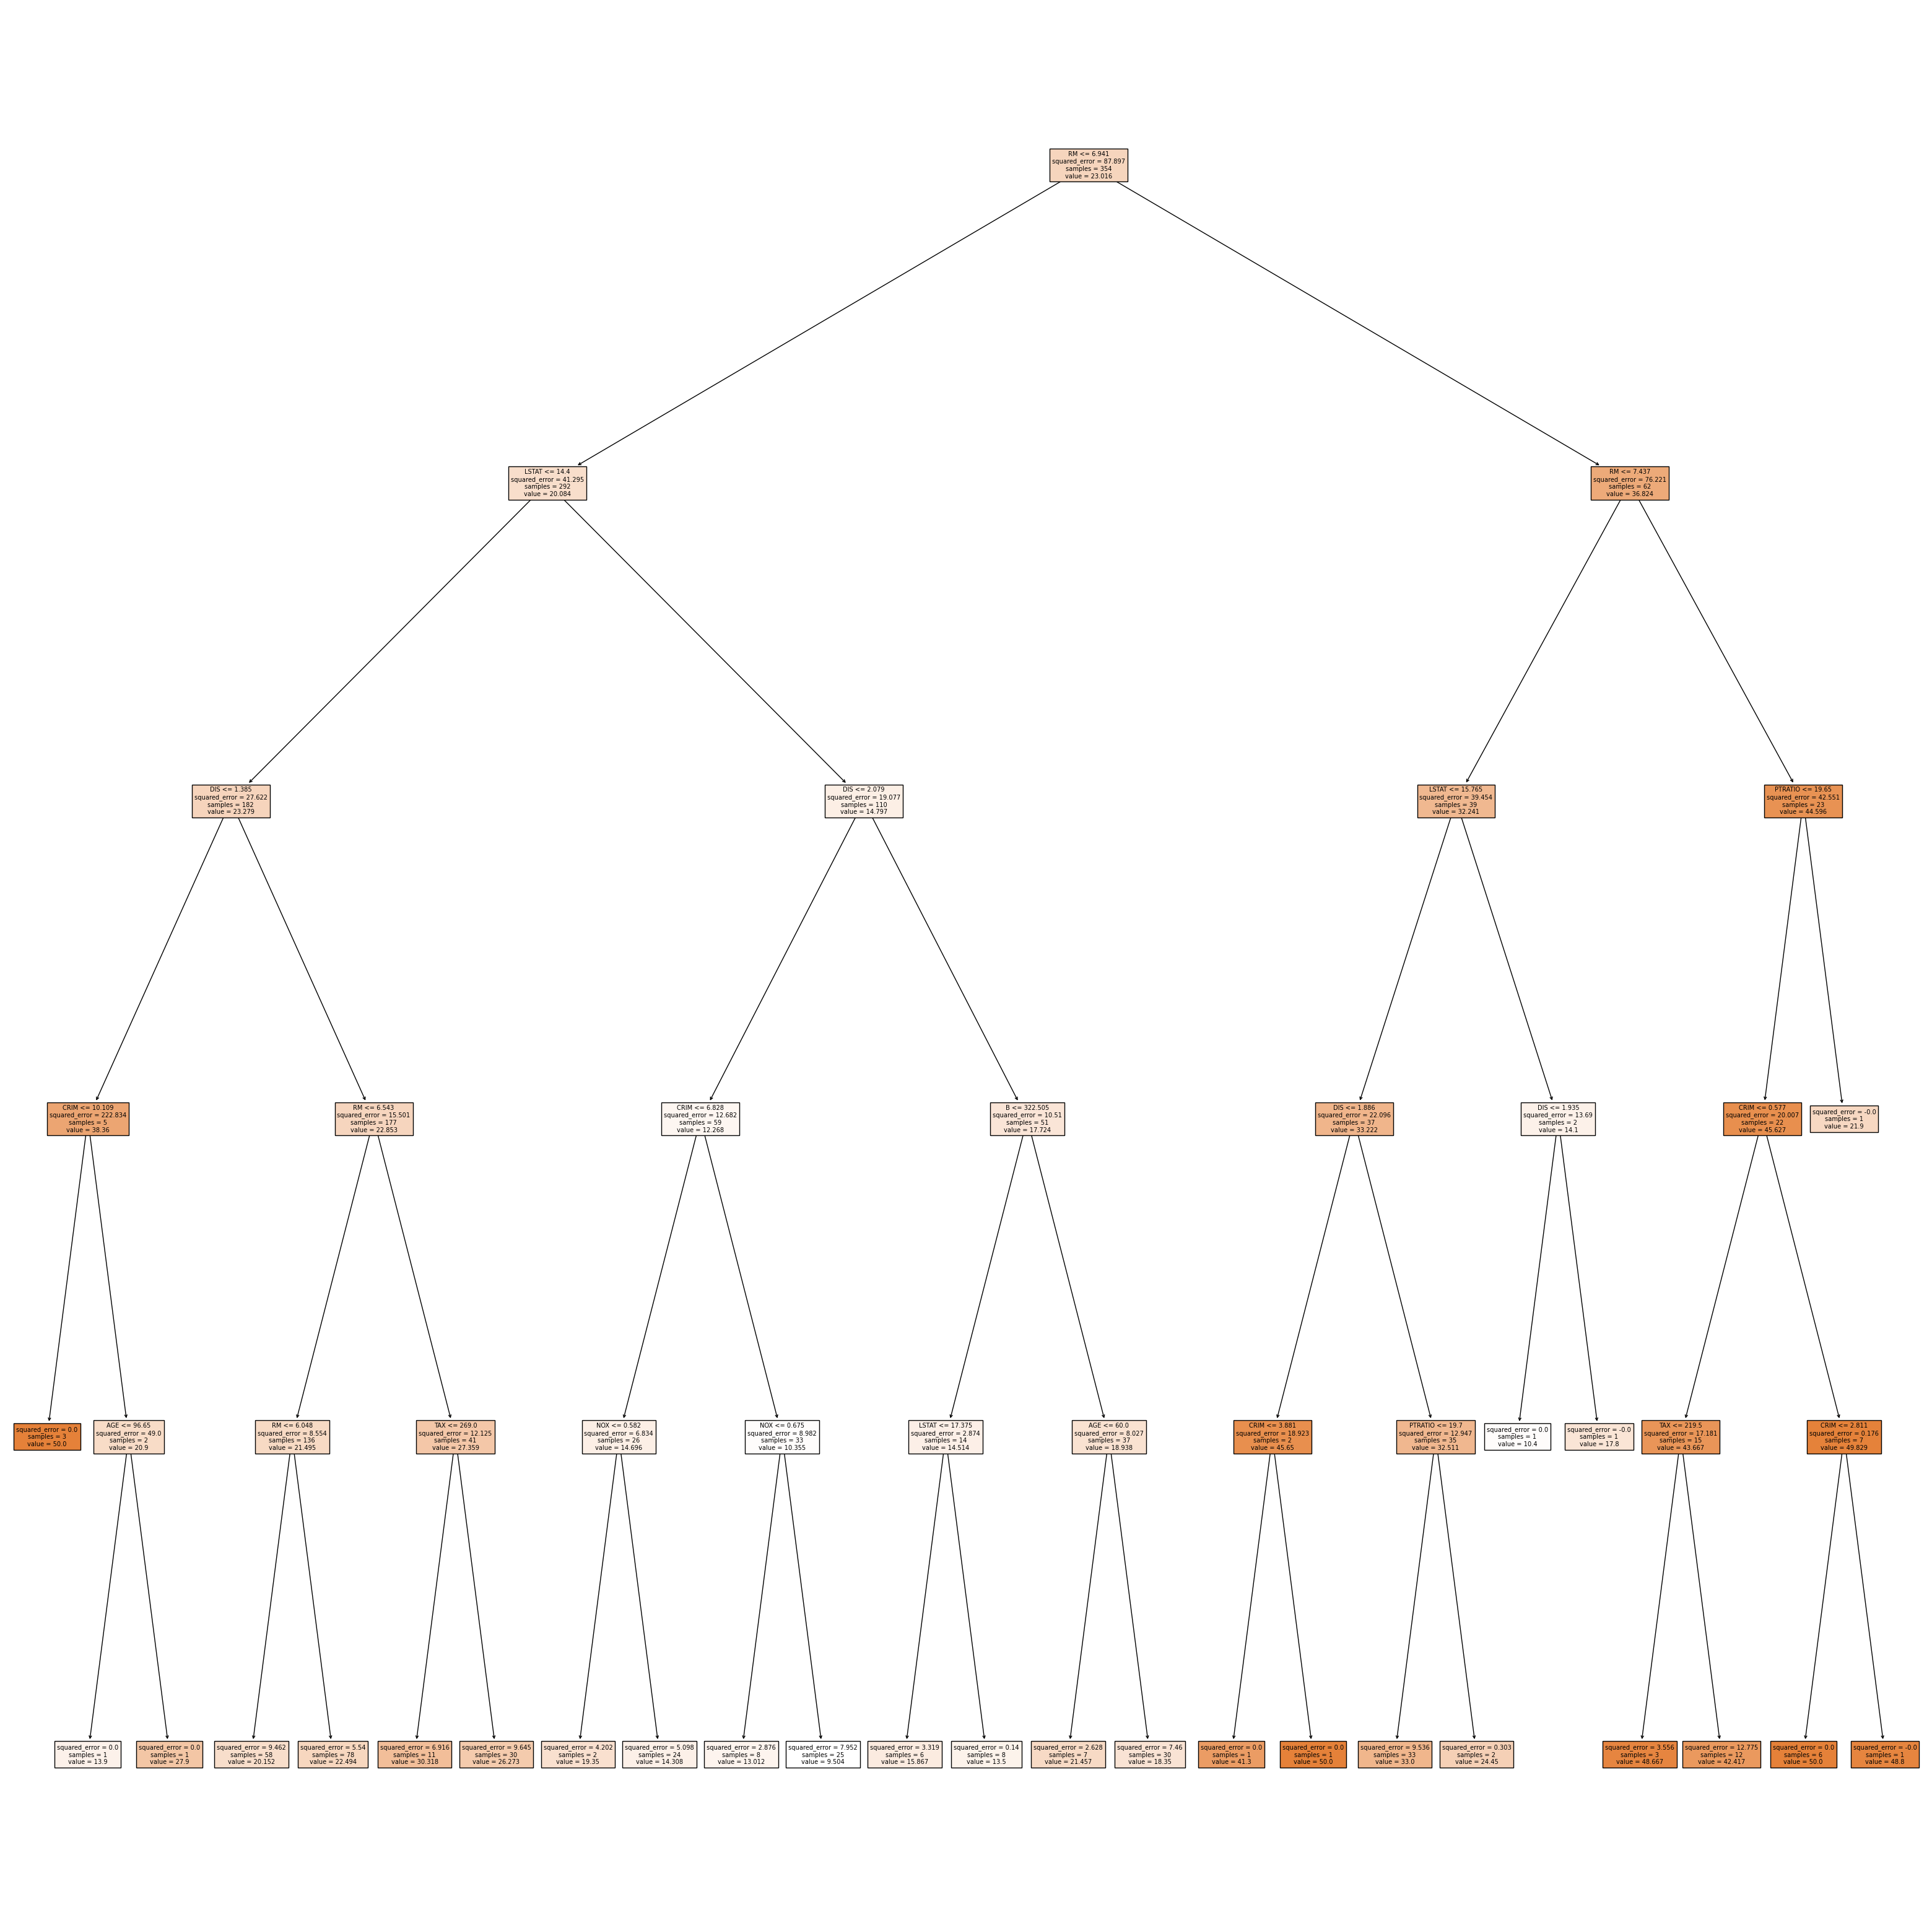

In [37]:
plt.figure(figsize=(40,40))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [38]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.1 MB/s eta 0:00:00


In [39]:
import seaborn as sb

<AxesSubplot:>

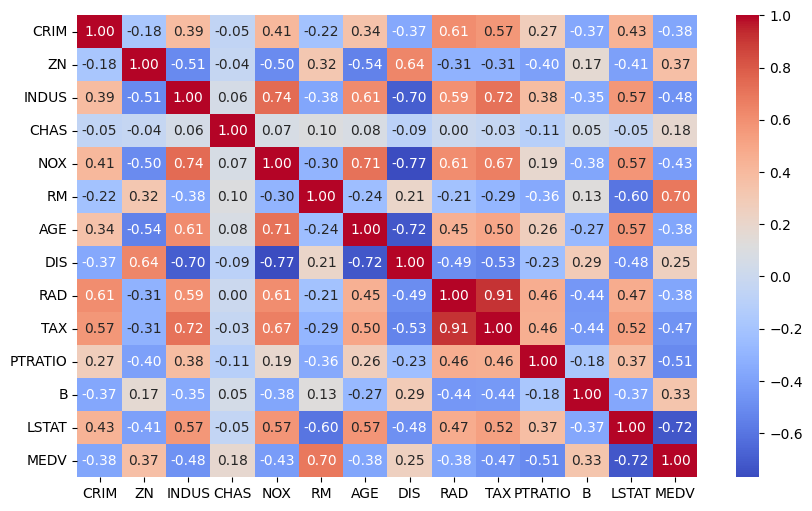

In [47]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt= ".2f")

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
model2= RandomForestRegressor(n_estimators=5, max_depth=5, random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=5, random_state=42)

In [53]:
y_pred2=model2.predict(X_test)

In [54]:
mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test,y_pred2)

print(f"MAE: {mae} MSE: {mse} R2: {r2}")


MAE: 2.5924493682503305 MSE: 13.520813296525835 R2: 0.8185444693515519


In [58]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    "n_estimators": list(range(5,15)),
    "max_depth": list(range(1,10))
}
grid= GridSearchCV(RandomForestRegressor(), param_grid, scoring="r2", cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
             scoring='r2')

In [59]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(RandomForestRegressor(max_depth=5, n_estimators=14),
 0.7995126002402388,
 {'max_depth': 5, 'n_estimators': 14})